# Intensity Controller

In this notebook we will evaluate the signal quality of the intensity controller and estimate an error by comparison with voltage differences in intensity measurements.

In [2]:
import os

from matplotlib import dates as mdates

os.makedirs('../../figure/intensity', exist_ok=True)

## Long term measurement

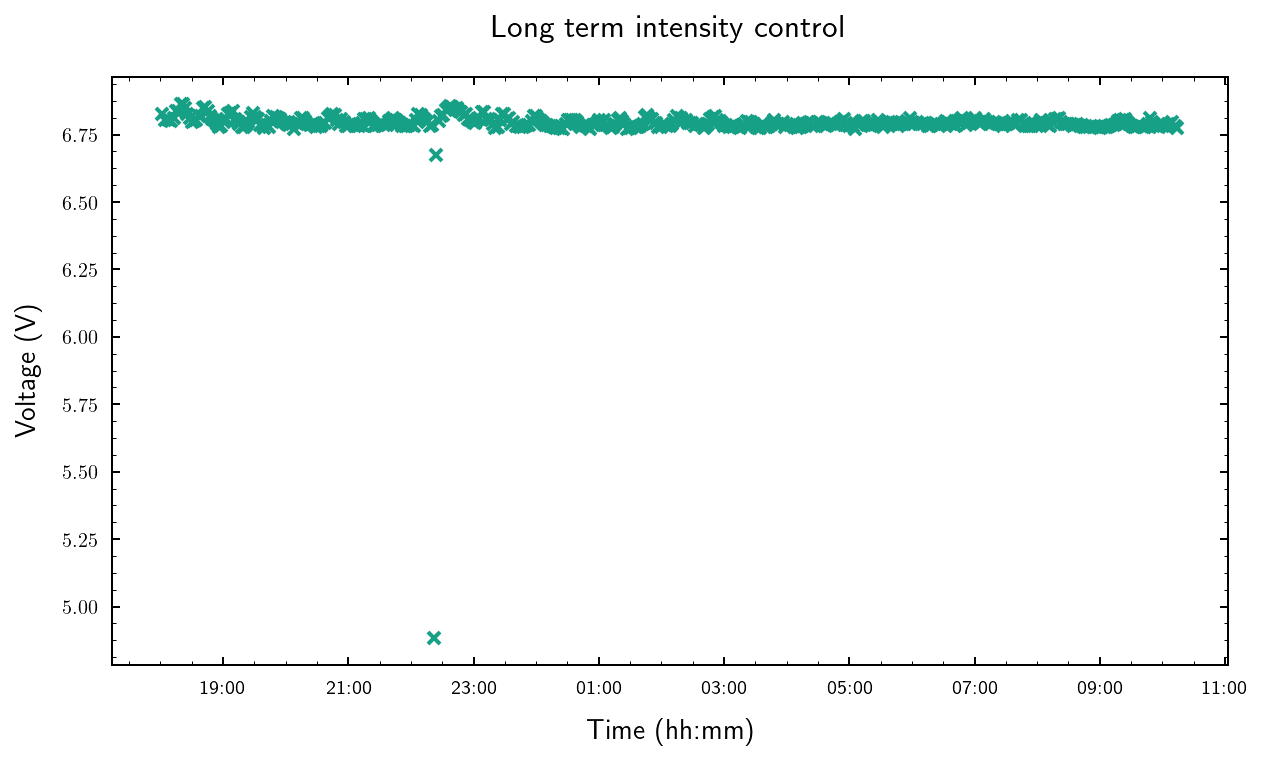

In [4]:
long = pd.read_hdf('../../dataset/intensity/control.h5', 'long')
long.time = pd.to_datetime(long.time, format='%Y-%m-%d_%H%M%S')

fig = plt.figure(figsize=(10, 6))
fig.autofmt_xdate()

axis = fig.add_subplot(111)
axis.set_title('Long term intensity control')
axis.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
axis.set_xlabel('Time (hh:mm)')
axis.set_ylabel('Voltage (V)')
axis.plot(long.time.astype('O'), long.voltage, marker='x', color='#16a085', linestyle='none')
fig.savefig('../../figure/intensity/control-long.pdf')

plt.show()

In [8]:
long.voltage.mean(), long.voltage.min(), long.voltage.max(), long.voltage.std()

(6.790721721811591, 4.883208036031497, 6.864006856101877, 0.09186888609865777)

## Short term measurement

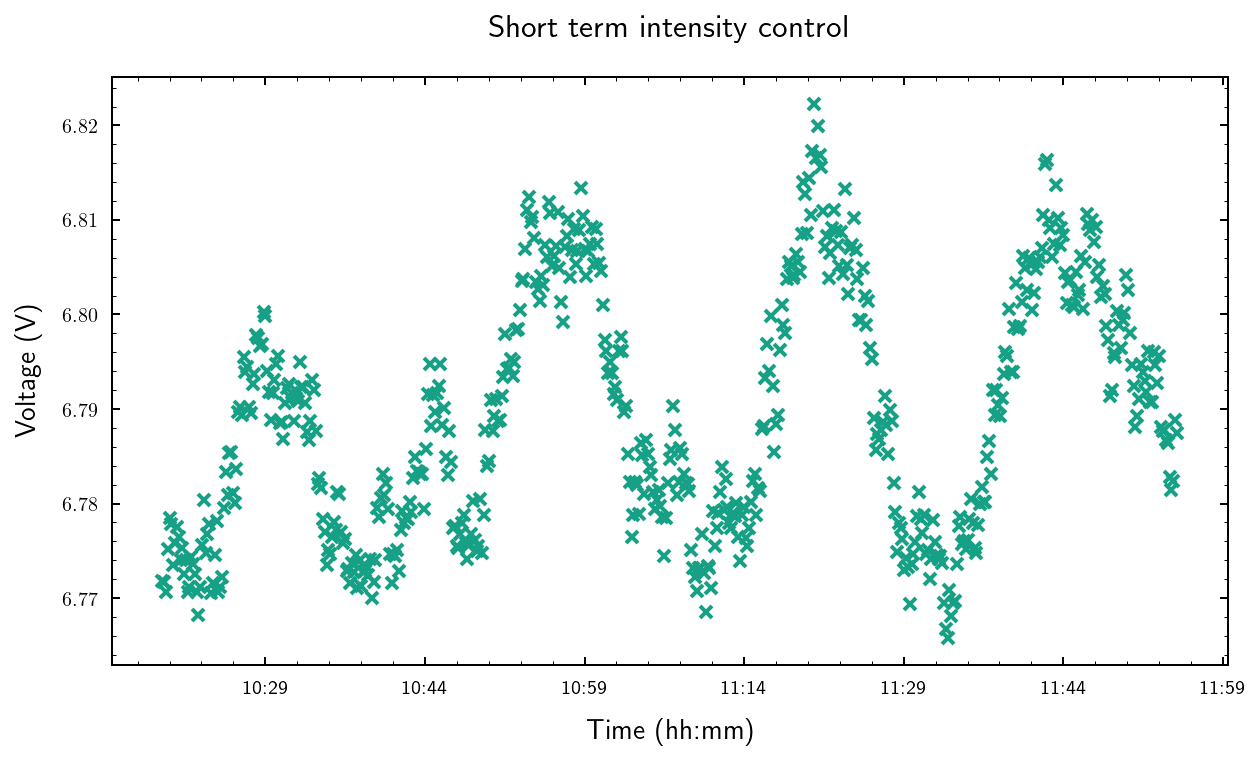

In [5]:
short = pd.read_hdf('../../dataset/intensity/control.h5', 'short')
short.time = pd.to_datetime(short.time, format='%Y-%m-%d_%H%M%S')

fig = plt.figure(figsize=(10, 6))
fig.autofmt_xdate()

axis = fig.add_subplot(111)
axis.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
axis.set_title('Short term intensity control')
axis.set_xlabel('Time (hh:mm)')
axis.set_ylabel('Voltage (V)')
axis.plot(short.time.astype('O'), short.voltage, marker='x', color='#16a085', linestyle='none')
fig.savefig('../../figure/intensity/control-short.pdf')

plt.show()

In [6]:
short.voltage.mean(), short.voltage.min(), short.voltage.max(), short.voltage.std()

(6.789301355971451, 6.765777897547424, 6.822276358793229, 0.012768993779543474)

## Comparison

We compare these results with usual the usual intensity precision observed during measurements. We choose the paired measurements as these require a higher sensitivity then the unpaired ones.

In [12]:
df = pd.read_hdf('../../dataset/intensity/paired-anticipated-frequency.h5', 'vsweep')

t = df.time
U = df['voltage@100000000.00']

U.mean(), U.min(), U.max(), U.std()

(0.861120101453624, 0.01888834880000001, 1.44683845184, 0.39522539288818503)

In [13]:
dU1 = short.voltage.max() - short.voltage.min()
dU2 = U.max() - U.min()

dU1, dU2, dU1 / dU2

(0.05649846124580549, 1.42795010304, 0.03956613128534705)

For typical measurements we can expect an error of about 4% due to intensity variations.